# Friction Factor - Re Relation

In [694]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

Given Data

In [695]:
d = 0.0218   #Diameter of pipe (m)
l = 2.725    #Length of pipe (m)
dc = 1487    #Density of chloroform (kg/m3)
dw = 1000    #Density of water (kg/m3)
vw = 0.00095 #Viscosity of water (Pas)
g = 9.81     #Gravity (m/s2)

A = math.pi*d*d/4  #CS Area (m2)

Importing Excel Data

In [696]:
df = pd.read_excel("PSL3.xlsx", sheet_name = 'Sheet1')
df = df[["Flow Rate","delta H"]]

Calculations

In [697]:
df["delta P"] = np.around(df["delta H"]*(dc-dw)*g/100, 1)
df["Velocity"] = np.around(df["Flow Rate"]/(3600*1000*A), 4)
df["Re"] = np.around(df["Velocity"]*d*dw/vw, 1)
df["f(Calculated)"] = np.around(df["delta P"]*d/(2*l*dw*df["Velocity"]*df["Velocity"]), 4)

Complex Calculation

In [698]:
def complex_calculation1(row, default):
    Re = row["Re"]
    
    complexcalc1 = 0.079*pow(Re, -0.25) if Re >= 2100.0 else 16/Re
    return complexcalc1

df["f(Theoretical)"] = np.around(df.apply(complex_calculation1, axis = 1, args=(1.0,)),4)

In [699]:
def complex_calculation2(row, default):
    Re = row["Re"]
    
    if (Re>=4000.0):
        complexcalc2= "Turbulent"
    elif (Re<=2100.0):
        complexcalc2 = "Laminar"
    else:
        complexcalc2 = "Transitional"
    return complexcalc2

df["Flow Regime"] = df.apply(complex_calculation2, axis = 1, args=(1.0,))

In [700]:
df["ln Re"] = np.around(np.log(df["Re"]),4)
df["ln f(Calc)"] = np.around(np.log(df["f(Calculated)"]), 4)

In [701]:
def col(row, default):
    Re = row["Re"]
    if Re<2100.0:
        col1="b"
    elif Re>4000.0:
        col1="r"
    else:
        col1="g"
    return col1

df["Color"] = df.apply(col, axis = 1, args=(1.0,))
df

,Flow Rate,delta H,delta P,Velocity,Re,f(Calculated),f(Theoretical),Flow Regime,ln Re,ln f(Calc),Color
0,48.58,1.4,66.9,0.0362,830.7,0.2042,0.0193,Laminar,6.7223,-1.5887,b
1,106.04,3.9,186.3,0.0789,1810.5,0.1197,0.0088,Laminar,7.5014,-2.1228,b
2,155.80,6.7,320.1,0.1159,2659.6,0.0953,0.0110,Transitional,7.8859,-2.3507,g
3,197.41,10.1,482.5,0.1469,3371.0,0.0894,0.0104,Transitional,8.1230,-2.4146,g
4,249.75,14.3,683.2,0.1859,4265.9,0.0791,0.0098,Turbulent,8.3584,-2.5370,r
5,295.89,19.2,917.3,0.2202,5053.0,0.0757,0.0094,Turbulent,8.5277,-2.5810,r
6,325.45,24.5,1170.5,0.2422,5557.9,0.0798,0.0091,Turbulent,8.6230,-2.5282,r
7,379.18,31.4,1500.1,0.2822,6475.7,0.0753,0.0088,Turbulent,8.7758,-2.5863,r


Graphs

ln f = -0.4837 ln Re +  1.5622


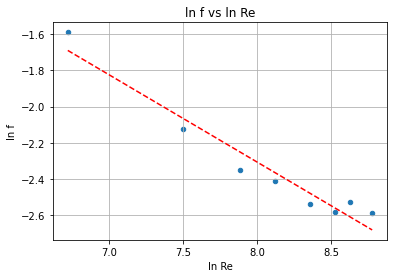

In [702]:
df.plot(x='ln Re', y='ln f(Calc)', kind='scatter')
m,b = np.polyfit(df["ln Re"], df["ln f(Calc)"], 1)
plt.plot(df["ln Re"], m*df["ln Re"]+b, 'r--')
equation = print('ln f =', np.around(m, 4), 'ln Re + ', np.around(b, 4))
plt.xlabel('ln Re')
plt.ylabel('ln f')
plt.title('ln f vs ln Re')
plt.grid()
plt.show()

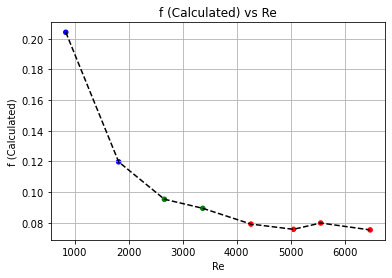

In [703]:
df.plot(x='Re', y='f(Calculated)', kind='scatter', color=df["Color"])
plt.plot(df["Re"], df["f(Calculated)"], 'k--')
plt.xlabel('Re')
plt.ylabel('f (Calculated)')
plt.title('f (Calculated) vs Re')
plt.grid()
plt.show()